* Reference : https://www.kaggle.com/code/rumasinha/visualizationseabornplotlymulticlassclassification

In [2]:
#libraries
import pandas as pd
import numpy as np


In [1]:
# visualization libraries
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
import plotly.express as px
import cufflinks as cf
cf.go_offline()
init_notebook_mode(connected=True)

In [3]:
# model training libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [6]:
#인덱스 제거
df = pd.read_csv("penguins.csv", index_col=0)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [7]:
df.shape

(344, 8)

In [9]:
#결측치 확인
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [10]:
#null 값 삭제
df = df.dropna()

In [12]:
#11개 행이 없어짐
df.shape

(333, 8)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 344
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


### Data visualization

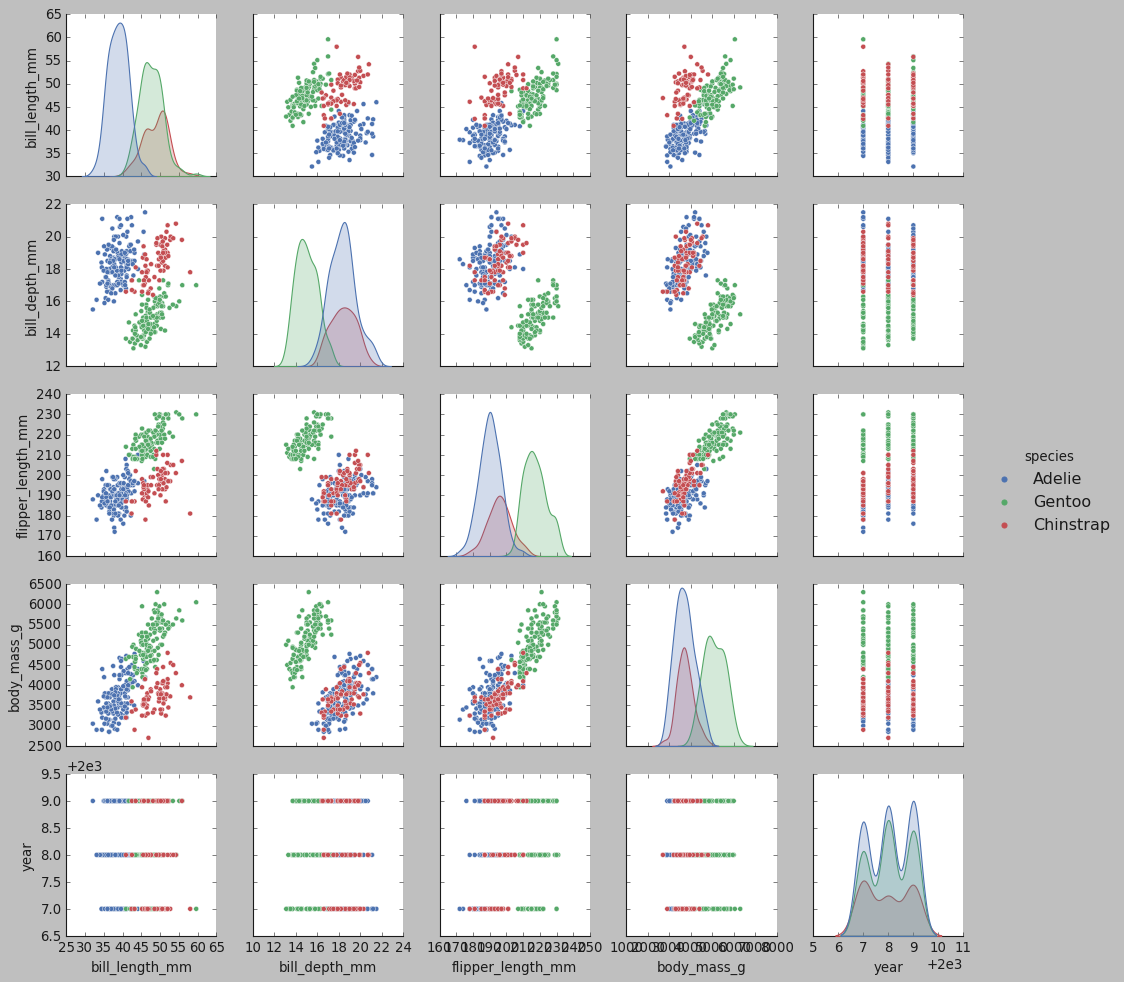

In [14]:
#데이터 분포확인
sns.pairplot(df,hue='species')

<AxesSubplot:xlabel='bill_length_mm', ylabel='Density'>

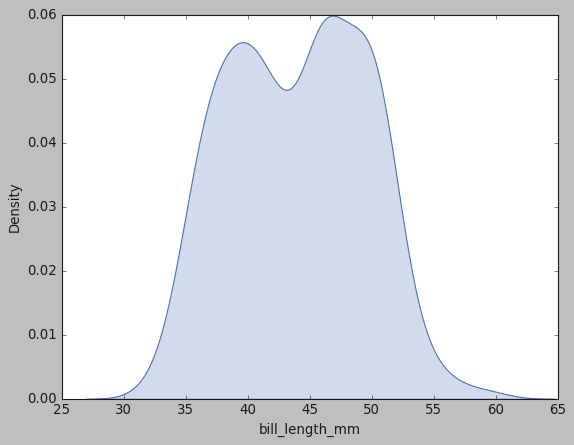

In [16]:
#'bill_length_mm' (부리의 길이) 데이터 밀도 확인
sns.kdeplot(df['bill_length_mm'], fill=True)

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

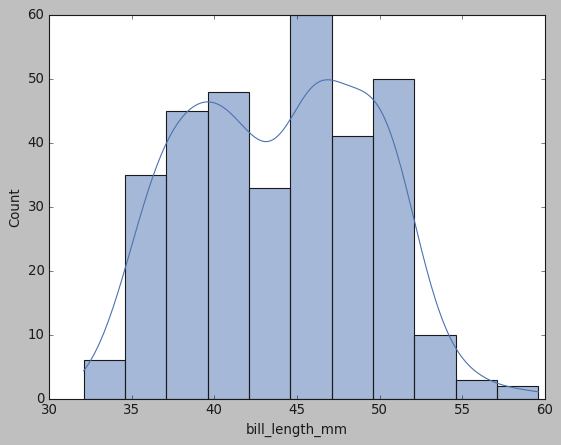

In [20]:
#'bill_length_mm' (부리의 길이) 데이터 분포와 밀도 확인
sns.histplot(df['bill_length_mm'], kde=True)

<AxesSubplot:xlabel='bill_depth_mm', ylabel='Count'>

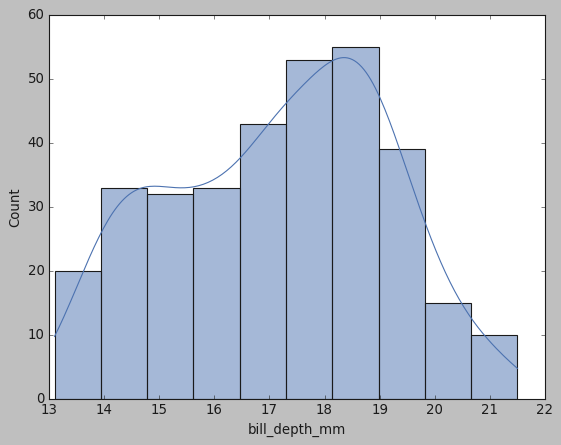

In [21]:
#'bill_depth_mm' (부리의 깊이) 데이터 분포와 밀도 확인
sns.histplot(df['bill_depth_mm'], kde=True)

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

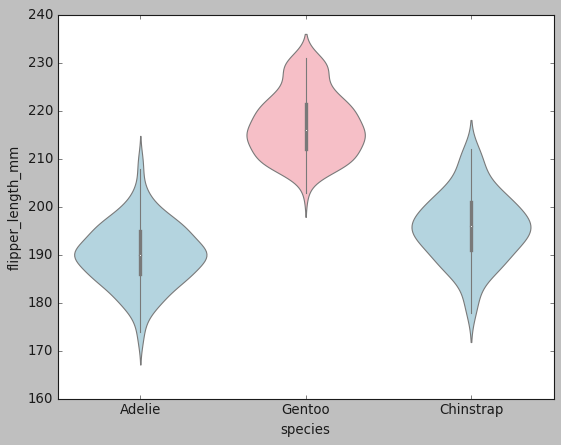

In [24]:
sns.violinplot(data=df, x="species", y="flipper_length_mm", palette=["lightblue", "lightpink"])4. 

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

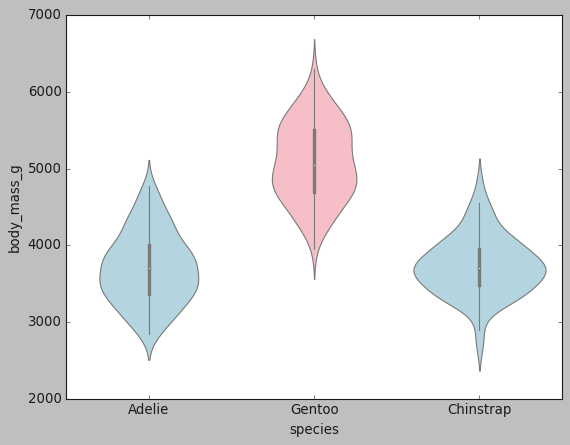

In [25]:
sns.violinplot(data=df, x="species", y="body_mass_g", palette=["lightblue", "lightpink"])

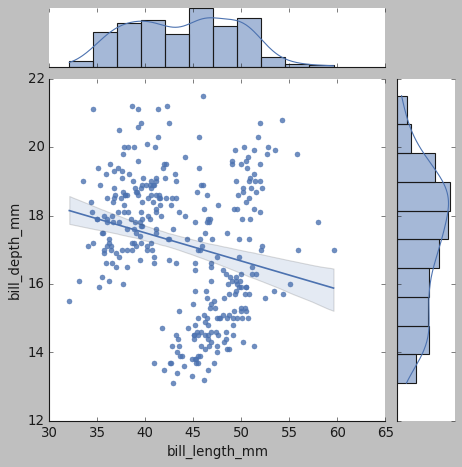

In [28]:
sns.jointplot(data=df,x="bill_length_mm",y="bill_depth_mm", kijjnd='reg')

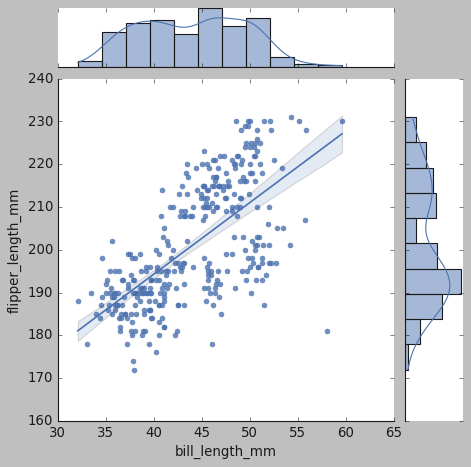

In [30]:
sns.jointplot(data=df,x="bill_length_mm",y="flipper_length_mm", kind='reg')

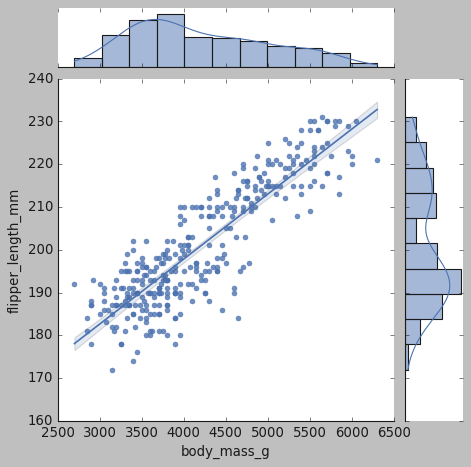

In [31]:
sns.jointplot(data=df,x="body_mass_g",y="flipper_length_mm", kind='reg')

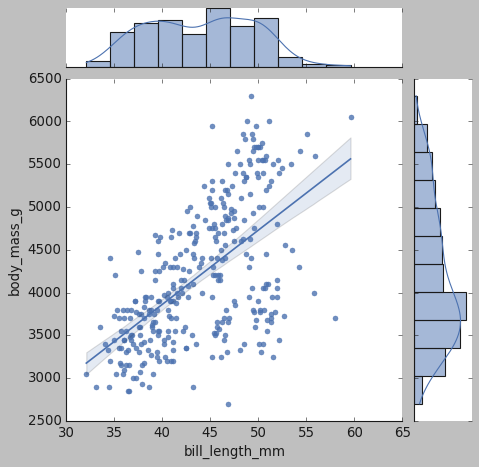

In [32]:
sns.jointplot(data=df,x="bill_length_mm",y="body_mass_g", kind='reg')

* 2022.09에 factorplot 기능이 없어졌다
* 년도별 종별 갯수를 보려고함

In [34]:
# year wise the count of different species can be seen. Adelie count more in 2009, Gentoo more in 2008.  Chinstrap decreased from 2007 to 2008 and increased again in 2009
# with sns.axes_style('white'):
#     g = sns.factorplot("year", data=df, aspect=4.0, kind='count',hue='species', order=range(2007, 2010))
#     g.set_ylabels('Number of Penguin Species')

Text(0, 0.5, 'Number of Penguin Species')

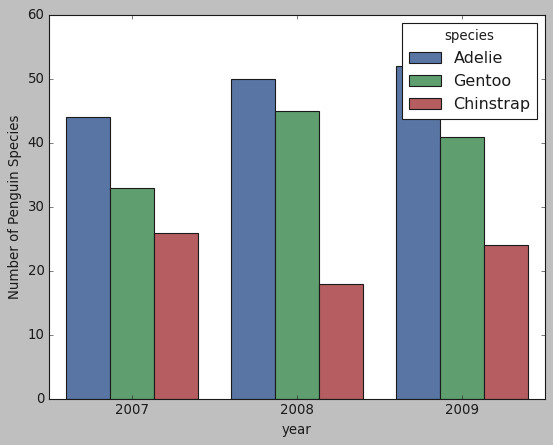

In [36]:
sns.countplot(data=df, x="year", hue="species")
plt.ylabel("Number of Penguin Species")

Text(0.5, 0, 'body_mass_g')

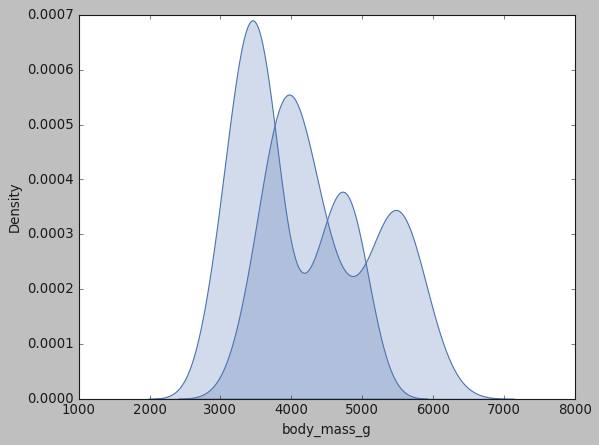

In [64]:
sns.kdeplot(df.body_mass_g[df.sex=='male'], label='Male', fill=True)
sns.kdeplot(df.body_mass_g[df.sex=='female'], label='Female', fill=True)
plt.xlabel('body_mass_g')
# How body_mass_g differs among the Male and Female penguins

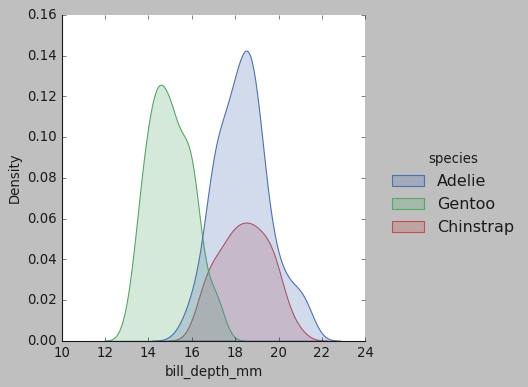

In [40]:
sns.displot(data=df, x='bill_depth_mm', hue='species', kind='kde', fill=True)
# How bill_depth_mm differs among the three species

* 왼쪽 bill_depth와 body_mass 데이터를 종별로 봤을 때 Adelie와 Chinstrap 분포가 비슷하다
* 하지만 종별 bill_depth 데이터 밀도를 봤을 때 Adelie와 Chistrap은 차이가 있다

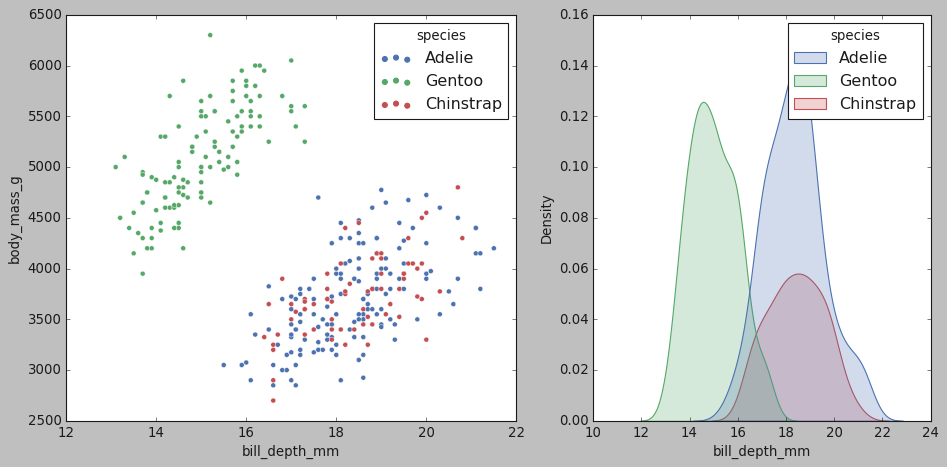

In [42]:
fig, ax = plt.subplots(1,2,figsize=(12,6), gridspec_kw=dict(width_ratios=[4,3]))
sns.scatterplot(data=df, x='bill_depth_mm',y='body_mass_g', hue='species', ax=ax[0])
# Adelie and Chinstrap mixed together and Gentoo pretty much separate group
sns.kdeplot(data=df, x='bill_depth_mm', hue='species', fill=True, ax=ax[1])
fig.tight_layout()

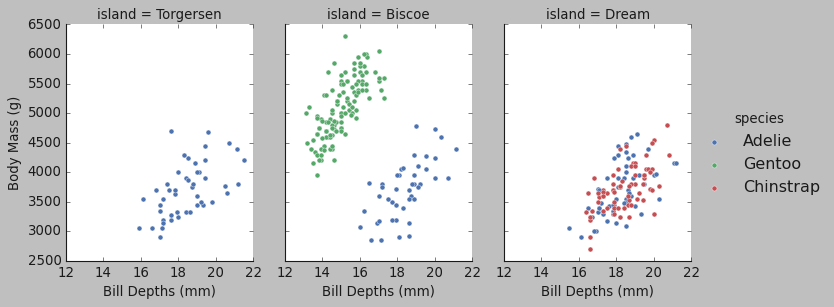

In [43]:
fig = sns.FacetGrid(df, col="island", hue="species", aspect=.75, height=4)
fig.map_dataframe(sns.scatterplot, x="bill_depth_mm", y="body_mass_g")  # bill_depth_mm vs body_mass_g in the 3 islands and the 3 species
fig.set_axis_labels("Bill Depths (mm)", "Body Mass (g)")
fig.add_legend()

In [44]:
#상관관계
df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


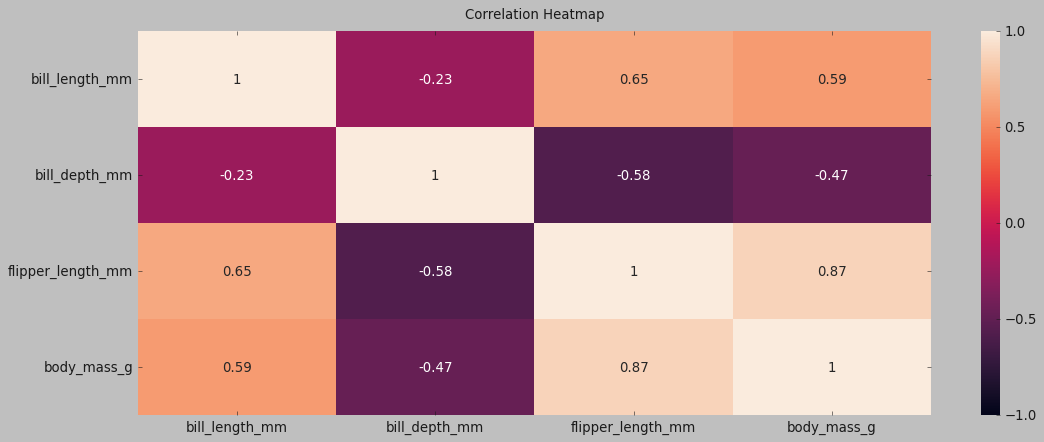

In [45]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

* 'flipper_length_mm'(날개의 길이) 와 'body_mass_g' 양의 상관관계를 보여줌 '0.87'
* 'bill_depth_mm'(부리의 깊이)와 'flipper_length_mm'(날개의 길이) 음의 상관관계를 보여줌 '-0.58'
* 'bill_length_mm'와 'flipper_length_mm'(날개의 길이) 양의 상관관계를 보여줌 '0.65'

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

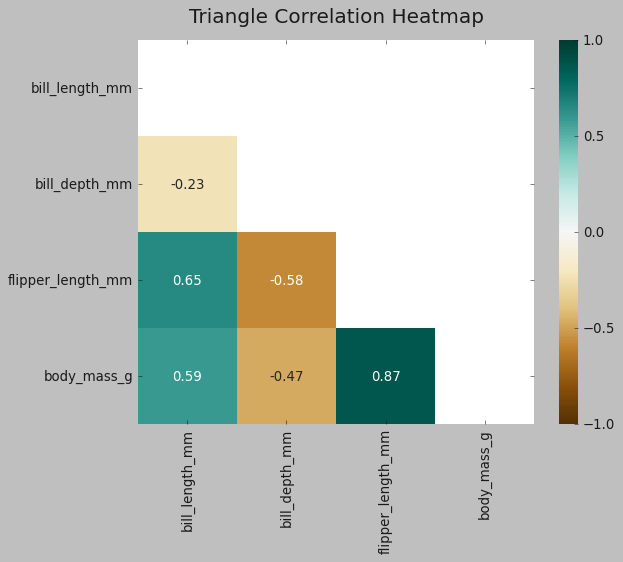

In [46]:
mask = np.triu(np.ones_like(df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].corr()))
heatmap = sns.heatmap(df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

### df.iplot
* 필요한 라이브러리
* import chart_studio.ploty as py
* import cufflinks as cf
* cf.go_offline(connected=True)
* 처음 써보는 라이브러리
* 참고 링크 : https://nyamin9.github.io/pandas_visual/iplot/

In [47]:
df.iplot(kind='scatter', x='bill_length_mm', y='flipper_length_mm', mode='markers')

In [49]:
df.iplot(kind='bar', x=['species', 'island'],y='flipper_length_mm')

In [50]:
# Create an interactive bar chart:
df.iplot(
    x='island',
    y='flipper_length_mm',
    kind='bar'
)

* 이거는 또 어떻게 그래프를 그린걸까

In [51]:
#defining data
trace = go.Scatter(x = df['bill_length_mm'],y=df['flipper_length_mm'],text = df['species'],mode='markers')
data=[trace]
#defining layout
layout = go.Layout(title='bill_length_mm Vs flipper_length_mm Scatter Plot',xaxis=dict(title='bill_length_mm'),yaxis=dict(title='flipper_length_mm'),hovermode='closest')
#defining figure and plotting
figure = go.Figure(data=data,layout=layout)
iplot(figure)

# we can hover over any data point to see the value

* px는 사용해본적 있다
* cufflink랑 px로 그린 그래프 차이점이 뭘까

In [52]:
fig = px.scatter(df, x="bill_length_mm", y='bill_depth_mm', color="species", size='year', hover_data=['flipper_length_mm'])
fig.show()
# we can hover over any data point to see the value

## Model training and evaluation

* 종을 분류하는 모델

In [53]:
# Train and test split
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [54]:
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### RandomForest Classification

* n_estimators 디폴트가 100인걸로 아는데 왜 10으로 했을까

In [57]:
### RandomForest Classification

# Use 10 random trees
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [59]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [60]:
preds = model.predict(X_test)

In [61]:
confusion_matrix(y_test,preds)

array([[39,  1,  0],
       [ 0, 19,  0],
       [ 0,  0, 41]], dtype=int64)

* 1.2버전에서는 곧 없어진다는데 어떤 모듈을 써야할까

C:\Users\chae\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



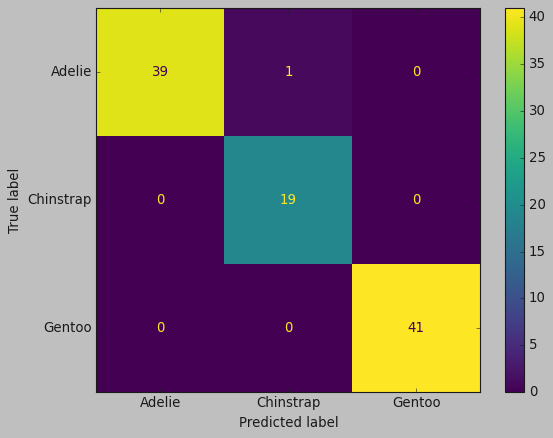

In [62]:
plot_confusion_matrix(model,X_test,y_test)

In [63]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.99        40
   Chinstrap       0.95      1.00      0.97        19
      Gentoo       1.00      1.00      1.00        41

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



### 모델 결과
* accuracy의 f1-score가 0.99로 매우 높다
* 그럼 모델 성능이 좋은 것인가...?